## Problem Statement
-  Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.
-  Sample Dataset :- https://www.kaggle.com/c/titanic/data

**Step 1:** Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Step 2:** Load the Dataset

In [2]:
# Load the dataset
titanic_df = pd.read_csv('train.csv')

# Display the first few rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 3:** Initial Inspection

In [3]:
# General information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics for all columns
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Step 4:** Check for Missing Values

In [5]:
titanic_df.shape

(891, 12)

In [6]:
# Check for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handle Missing Values

In [7]:
# Fill missing Age values with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Drop the Cabin column (too many missing values)
titanic_df.drop(['Cabin'], axis=1, inplace=True)

# Drop rows with missing Embarked values
titanic_df.dropna(subset=['Embarked'], inplace=True)


**Step 5:** Check for Duplicates

In [8]:
# Check for duplicate rows
duplicates = titanic_df.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Remove duplicates if any
titanic_df.drop_duplicates(inplace=True)

Duplicates: 0


**Step 6:** Data Type Conversion

In [9]:
# Convert categorical columns to category type
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

### **Step 7:** Exploratory Data Analysis (EDA)

### Univariate Analysis

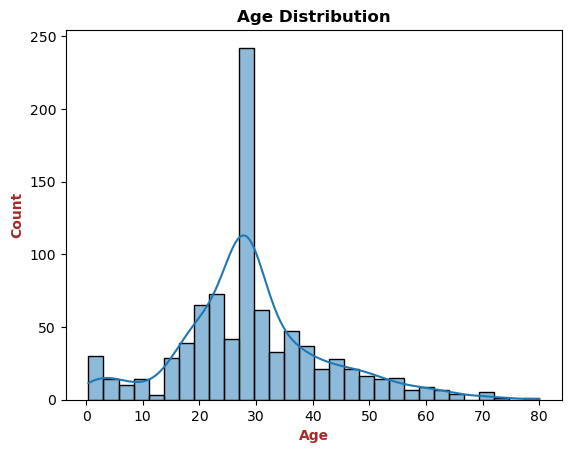

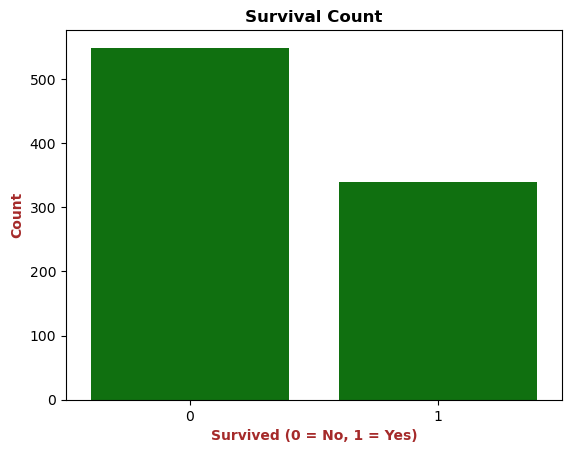

In [17]:
# Distribution of Age
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution',fontweight='bold')
plt.xlabel('Age',color='brown',fontweight='bold')
plt.ylabel('Count',color='brown',fontweight='bold')
plt.show()

# Count plot for Survived
sns.countplot(x='Survived', data=titanic_df,color='green')
plt.title('Survival Count',fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)',color='brown',fontweight='bold')
plt.ylabel('Count',color='brown',fontweight='bold')
plt.show()


### Bivariate Analysis

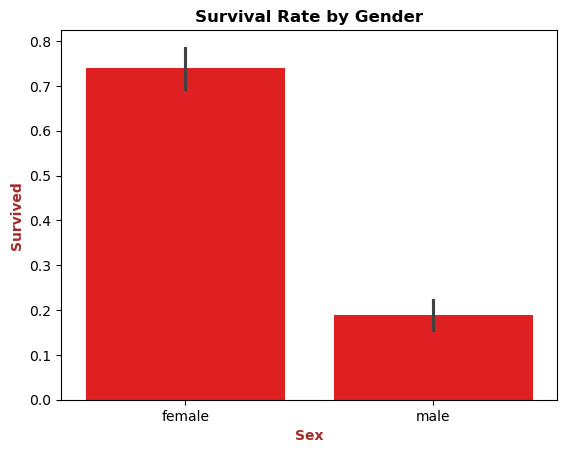

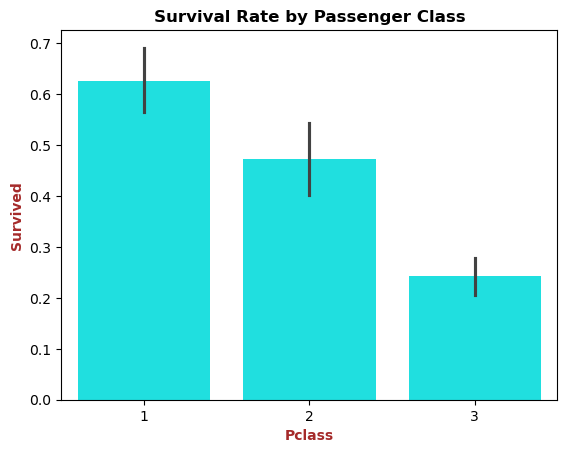

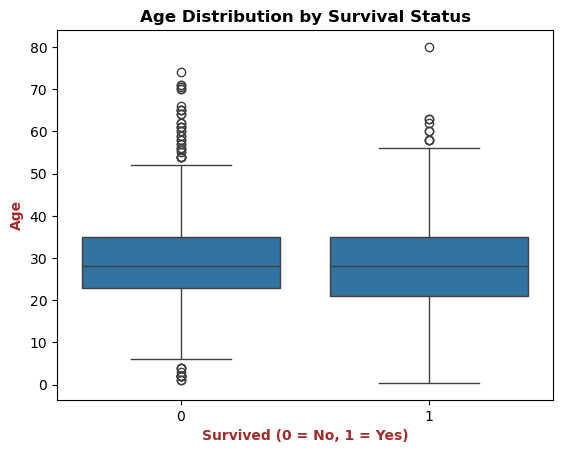

In [24]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_df,color='red')
plt.title('Survival Rate by Gender',fontweight='bold')
plt.xlabel('Sex',color='brown',fontweight='bold')
plt.ylabel('Survived',color='brown',fontweight='bold')
plt.show()

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=titanic_df,color='cyan')
plt.title('Survival Rate by Passenger Class',fontweight='bold')
plt.xlabel('Pclass',color='brown',fontweight='bold')
plt.ylabel('Survived',color='brown',fontweight='bold')
plt.show()

# Age distribution by survival status
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age Distribution by Survival Status',fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)',color='brown',fontweight='bold')
plt.ylabel('Age',color='brown',fontweight='bold')
plt.show()

### Trends and Patterns

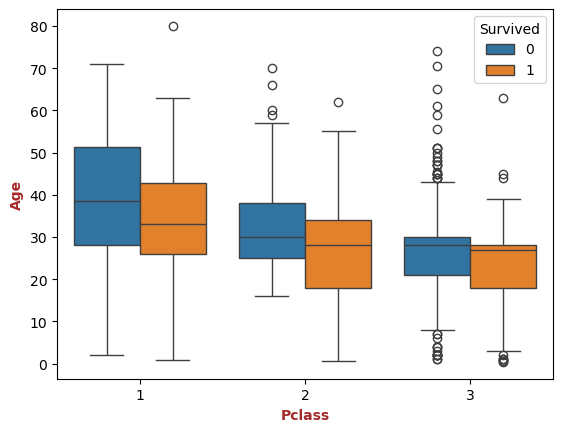

In [25]:
# Trends and patterns
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_df)
plt.xlabel('Pclass',color='brown',fontweight='bold')
plt.ylabel('Age',color='brown',fontweight='bold')
plt.show()

### Correlation Analysis

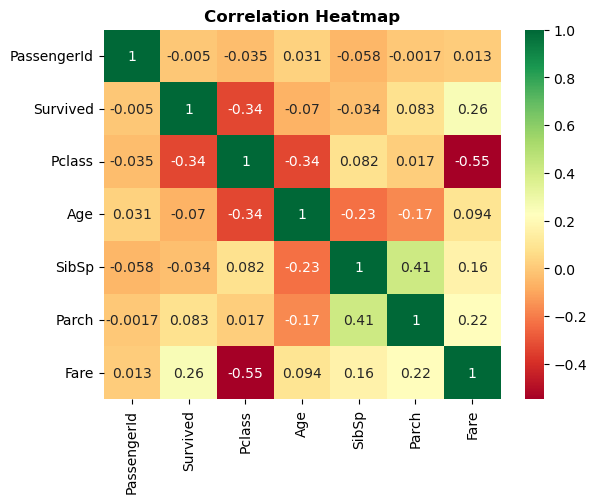

In [26]:
# Heatmap of correlations
# Select only numeric columns
numeric_df = titanic_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap',fontweight='bold')
plt.show()

### **Step 9:** Save the Cleaned Dataset

In [27]:
# Save the cleaned dataset for future use
titanic_df.to_csv('cleaned_titanic_data.csv', index=False)

# **Titanic Survival Analysis Insights**

## Overview
-  This analysis focuses on cleaning and exploring the Titanic dataset to identify factors influencing passenger survival. The process involved data cleaning, handling missing values, and performing exploratory data analysis (EDA) using visualizations and statistical summaries.

## Key Findings

**1. Gender:**
-  Insight: Gender played a significant role in survival rates.
-  Females had a much higher survival rate (74%) compared to males (19%).
-  Reason: This disparity is likely due to the ```women and children first``` evacuation policy.

**2. Passenger Class (Pclass):**
-  Insight: Survival chances were higher for passengers in upper classes.
1st Class: ~63% survived.
2nd Class: ~47% survived.
3rd Class: ~24% survived.
-  Reason: Higher-class passengers had better access to lifeboats.

**3. Age:**
-  Insight: Younger passengers, especially children, had higher survival rates.
-  Median age of survivors was lower than that of non-survivors.
-  Children under 16 had notably better survival odds.
-  Visualization: Box plots showed a distinct age distribution between survivors and non-survivors.

**4. Embarkation Port (Embarked):**
-  Insight: Survival rates varied based on the embarkation point.
-  Passengers who embarked at Cherbourg (C) had the highest survival rate.
-  Passengers from Southampton (S) had lower survival odds.
-  Reason: Socioeconomic factors might have influenced this trend.

**5. Ticket Fare:**
-  Insight: Higher fares were strongly correlated with better survival chances.
-  Passengers who paid more were often in upper classes, contributing to their higher survival rate.


## Patterns and Trends

**Correlation Analysis:**

-  Positive correlation between survival and fare (wealthier passengers had better odds).
-  Strong relationship between survival and passenger class.

**Survival by Gender and Class:**

-  Female passengers in 1st Class had the highest survival rate.
-  Male passengers in 3rd Class had the lowest survival odds.

**Missing Values and Their Impact:**

-  Missing data in the Age column was handled using the median.
-  Cabin had too many missing values and was dropped.

## Process Overview

**Data Cleaning:**

-  Handled missing values in Age, dropped the Cabin column, and ensured no duplicates.
-  Converted categorical variables (Sex and Embarked) to numeric or categorical data types.

**Exploratory Data Analysis (EDA):**

-  Performed univariate analysis to understand individual variables like Age and Fare.
-  Conducted bivariate analysis to explore survival patterns by Sex, Pclass, and Embarked.
-  Created a heatmap to visualize correlations among numeric features.

## Conclusion

-  Survival on the Titanic was influenced by gender, age, class, and embarkation point.
-  Social priorities (e.g., "women and children first") and economic status significantly impacted outcomes.
